In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_video_duration(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    cap.release()
    return duration

In [8]:
def plot_video_durations(folders, labels):
    all_video_durations = []
    for folder in folders:
        video_durations = []
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith(('.mp4', '.avi')):
                    video_path = os.path.join(root, file)
                    duration = get_video_duration(video_path)
                    video_durations.append(duration)
        all_video_durations.append(video_durations)

    plt.hist(all_video_durations, bins=20, color=['yellowgreen', 'skyblue'], alpha=0.7, label=labels)
    plt.xlabel('Video Duration (seconds)', fontdict={'fontfamily': 'serif'})
    plt.ylabel('Frequency', fontdict={'fontfamily': 'serif'})
    plt.title('Video Durations Histogram', fontdict={'fontfamily': 'serif'})
    plt.legend()
    plt.show()

In [9]:
Real = 'C:/Users/joshi/OneDrive/Desktop/New/Real'
Fake = 'C:/Users/joshi/OneDrive/Desktop/New/Fake'
folders = [Real, Fake]
labels = ['Real', 'Fake']

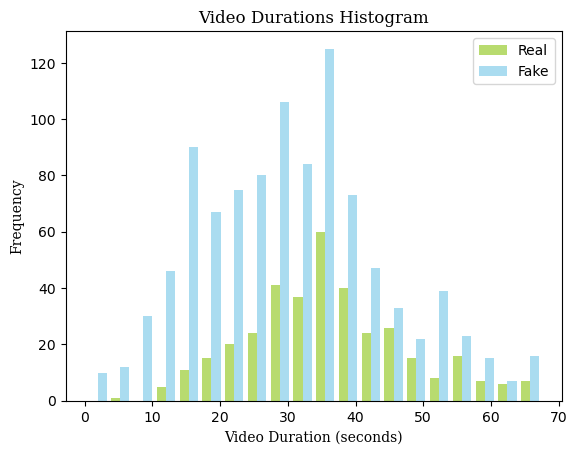

In [10]:
plot_video_durations(folders, labels)

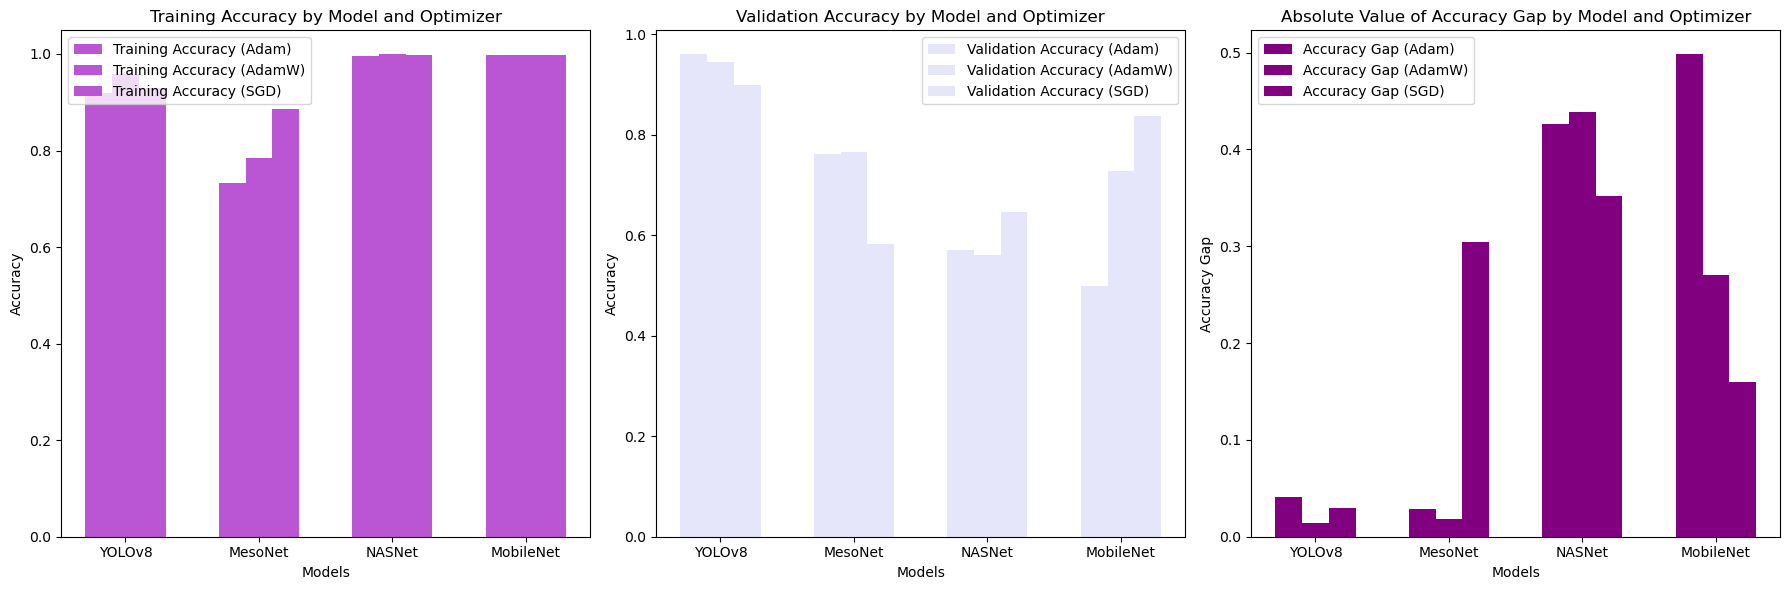

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
models = ['YOLOv8', 'MesoNet', 'NASNet', 'MobileNet']
optimizers = ['Adam', 'AdamW', 'SGD']
training_accuracy = np.array([
    [0.919, 0.959, 0.929],
    [0.732, 0.784, 0.886],
    [0.996, 0.999, 0.998],
    [0.998, 0.997, 0.998]
])
validation_accuracy = np.array([
    [0.960, 0.945, 0.899],
    [0.761, 0.766, 0.582],
    [0.570, 0.560, 0.646],
    [0.500, 0.727, 0.838]
])

# Calculate absolute value of accuracy gap
accuracy_gap = np.abs(training_accuracy - validation_accuracy)

# Plotting
index = np.arange(len(models))
bar_width = 0.2

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plotting training accuracy
for i, optimizer in enumerate(optimizers):
    axs[0].bar(index + i * bar_width, training_accuracy[:, i], bar_width, label=f'Training Accuracy ({optimizer})', color='mediumorchid')

axs[0].set_xlabel('Models')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training Accuracy by Model and Optimizer')
axs[0].set_xticks(index + bar_width)
axs[0].set_xticklabels(models)
axs[0].legend()

# Plotting validation accuracy
for i, optimizer in enumerate(optimizers):
    axs[1].bar(index + i * bar_width, validation_accuracy[:, i], bar_width, label=f'Validation Accuracy ({optimizer})', color='lavender')

axs[1].set_xlabel('Models')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Validation Accuracy by Model and Optimizer')
axs[1].set_xticks(index + bar_width)
axs[1].set_xticklabels(models)
axs[1].legend()

# Plotting absolute value of accuracy gap
for i, optimizer in enumerate(optimizers):
    axs[2].bar(index + i * bar_width, accuracy_gap[:, i], bar_width, label=f'Accuracy Gap ({optimizer})', color='purple')

axs[2].set_xlabel('Models')
axs[2].set_ylabel('Accuracy Gap')
axs[2].set_title('Absolute Value of Accuracy Gap by Model and Optimizer')
axs[2].set_xticks(index + bar_width)
axs[2].set_xticklabels(models)
axs[2].legend()

plt.tight_layout()
plt.show()


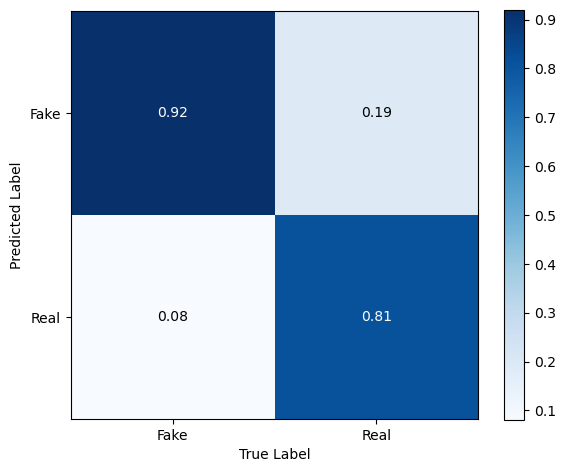

In [2]:
import numpy as np
import matplotlib.pyplot as plt


conf_matrix_normalized  =  np.array([[0.92, 0.19], [0.08, 0.81]])



# Define class labels
class_labels = ['Fake', 'Real']

# Plot the normalized confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues)

cbar = plt.colorbar(shrink=0.72) 
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Add numerical values inside the cells
thresh = conf_matrix_normalized.max() / 2.
for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    plt.text(j, i, format(conf_matrix_normalized[i, j], '.2f'),
             ha="center", va="center",
             color="white" if conf_matrix_normalized[i, j] > thresh else "black")

plt.ylabel('Predicted Label')
plt.xlabel('True Label')
plt.tight_layout()
plt.show()
